# mixin

In [6]:
class WifiMixin:
    def connect_to_wifi(self):
        print("You are conected to wifi")

class MusicMixin:
    def play_music(self):
        print("playing music")
        
class Vehicle:
    def move(self):
        pass
    
class Car(Vehicle, WifiMixin, MusicMixin):
    pass

class AirPlane(Vehicle):
    pass

class MotorCycle(Vehicle, MusicMixin):
    pass

car = Car()
car.connect_to_wifi()
car.play_music()

print()

motor = MotorCycle()
motor.play_music()

You are conected to wifi
playing music

playing music


# duck typing

In [10]:
# مثل تابع لن که براش مهم نیست نوع شی نیست تا وقتی که آبجکت متد لن داشته باشد کافی است

s = "reza"
t = (1, 2)
li = [3, 4]
print(len(s))
print(dir(s))
print(len(t))
print(dir(t))
print(len(li))
print(dir(li))

print()

print(len(5))
print(dir(5))

# گاهی اوقات ممکن است آبجکت آن متد را نداشته باشد
# مفاهیمی وجود دارند که با آنها میشود این مشکل را کنترل کرد


4
['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isascii', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'removeprefix', 'removesuffix', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']
2
['__add__', '__class__', '__cla

TypeError: object of type 'int' has no len()

In [14]:
# LBYL -> look before you leap

# بی گدار به آب نزدن 
# اول اندیشه بعد بررسی کن

# اول متدی را بررسی بکن وجود داردبعد استفاده بکن

def check_len(obj):
    # if "__len__" in dir(obj):
    if hasattr(obj, "__len__"):
        print(len(obj))
    else:
        print("sorry...")
        
check_len(5)
check_len([1, 2])

# این روش کمی کد را طولانی تر میکند


sorry...
2


In [16]:
# EAFP -> its easier to ask for forgiveness than permission

# بخشش بهتر از طلب بخشش است

# کارت رو انجام بده اگر درست کار نکرد معذرت خاهی بکن

def check_len(obj):
    try:
        print(len(obj))
    except TypeError:
        print("sorry...")
        
check_len(5)
check_len([1, 2])


sorry...
2


In [19]:
d = {"a":1, "b":2, "c":3}

if "b" in d.keys():
    print(d["b"])
else:
    print("sorry...")
    
try:
    print(d["b"])
except:
    print("sorry...") 
    
# در دیکشنری میتونیم از گت استفاده بکنیم اگر وجود نداشته باشد نان میدهد

print(d.get("b"))
print(d.get("f"))

2
2
2
None


In [21]:
class Duck:
    def move(self):
        print("I am swimming...")
        
class Person:
    def move(self):
        print("I am walking...")
        
class Plane:
    def move(self):
        print("I am flying...")
        
def func(obj):
    obj.move()
    
#  تا زمانیکه رفتار ماشبهی انجام میدهند برای ما مهم نیست و رفتار آنها مهم است که همان متد موو که در همه وجود دارد است 
d = Duck()
h = Person()
p = Plane()

func(d)
func(h)
func(p)


I am swimming...
I am walking...
I am flying...


In [30]:
# __dict__

# پراپرتی های آبجکت را بصورت دیکشنری نمایش میدهد

class Person:
    def __init__(self, **kwargs):
        for key , value in kwargs.items():
            setattr(self, key , value)
            
p = Person(name="ali", age=12)

print(p.__dict__)

{'name': 'ali', 'age': 12}


# call

In [31]:
def func():
    pass

class A:
    pass

x = 5

# از کجا بفهمیم یک آبجکت قابلیت فراخوانی دارد یا ن

print(callable(x))
print(callable(func))
print(callable(A))

False
True
True


In [32]:
class A:
    pass

a = A()

# درسته که کلاس قابل فراخوانی است اما آبجکت قابل فراخوانی نیست
print(callable(A))
print(callable(a))


True
False


In [37]:
# یکسری آبجکت ها را میخاهیم بنویسیم که قابلیت فراخوانی دارند
# __call__

class A:
    def __init__(self, x):
        print("init")
        self.x = x
        
    def __call__(self, z):
        print("call")
        self.z = z

a = A(2)

a(5)
print(a.z)

# وقتی کاربرد دارد که میخاهیم دوباره مقداردهی بکنیم مثل اینیت

init
call
5


# type of methods in class

In [48]:
from datetime import datetime
from pprint import pprint

class Product:
    def __init__(self, product_name, price, off):
        self.product_name = product_name
        self.price = price
        self.off = off
        
    def __str__(self):
        return self.product_name
        
class Comment:
    website_name = "www.amir.ir"
    
    def __init__(self, product, name, description):
        self.product = product
        self.name = name
        self.description = description
        self.data = datetime.now()
    # instance method
    def show(self):
        pprint(f"name : {self.name} , product : {self.product} , description : {self.description}")
        
    # class method
    @classmethod
    def info(cls):
        print(f"website : {cls.website_name}")


# instance methodes
# به اینها اینستنس متد میگویند یعنی متد آبجکت
# رایج ترین متدها
# لازم نیست برای تعریف آنها از دکرتور استفاده بکنیم
# برای دستیابی و استفاده از اینستنس اتریبیوت ها استفده میشه
# باید خود آبجکت (سلف) را بگیرند تا بتوانند روی آن تغییر دهند

# class methodes
# به آبجکت و اتریبیوت های آن دسترسی ندراند
# به کلاس اتریبیوت ها دسترسی دارند
# قبل آن از این دکرتور استفاده میکنیم
# @classmethod
# با سی ال اس ما به خود کلاس دسترسی داریم نه اتریبیوت ها آبجکت و به خود کلاس اشاره میکند
# cls



phone = Product("phone", 0, 0)
c1 = Comment(phone, "reza", "good")
c1.show()

print()

Comment.info()

'name : reza , product : phone , description : good'

website : www.amir.ir


In [54]:
# یک نوع دیگر از کلاس متد کارکرد متفاوت دارد و آبجکت ایجاد میکند
# قبل آن میتونیم یکسری تغییرات در ورودی آنها بدهیم

from datetime import datetime
from pprint import pprint

class Product:
    def __init__(self, product_name, price, off):
        self.product_name = product_name
        self.price = price
        self.off = off
        
    def __str__(self):
        return self.product_name
        
class Comment:
    website_name = "www.amir.ir"
    
    def __init__(self, product, name, description):
        self.product = product
        self.name = name
        self.description = description
        self.data = datetime.now()
    
    def show(self):
        pprint(f"name : {self.name} , product : {self.product} , description : {self.description}")
        
    @classmethod
    def info(cls):
        print(f"website : {cls.website_name}")
    
    @classmethod
    def cesorship(cls, product, name, description):
        print("the comment was censored!!!")
        sc = description.replace("slutty" , "****")
        return cls(product, name, sc)
    # زیرا کلاس گرفته میتونه از همان آبجکت ایجاد بکنه

    
phone = Product("phone", 0, 0)
c1 = Comment(phone, "reza", "good")
c1.show()
print("-" * 40)
c2 = Comment.cesorship(phone, "reza", "what slutty")
c2.show()


'name : reza , product : phone , description : good'
----------------------------------------
the comment was censored!!!
'name : reza , product : phone , description : what ****'


In [58]:
# static methods
# نه به آبجکت کار داره نه به کلاس اما نیاز به آن در کلاس داریم
# اگر قراره چنتا کلاس مختلف از آن استفاده بکنند همین بیرن کلاس تعریف کینم
# ورودی اجباری مثل متد های دیگر ندارد
# هم میتونیم داخل کلاس بنویسیم و هم خارجش
# وقتی داخل کلاس استفاده میکنیم باید از دکرتور استاتیک متد استفاده بکنیم و اینکه برای فراخوانی از اسم کلاس یا آبجکت استفاده بکنیم
# @staticmethod

from datetime import datetime
from time import sleep

class Product:
    def __init__(self, product_name, price, off):
        self.product_name = product_name
        self.price = price
        self.off = off
        
    def __str__(self):
        return self.product_name
        
class Comment:
    website_name = "www.amir.ir"
    
    def __init__(self, product, name, description):
        self.product = product
        self.name = name
        self.description = description
        self.data = datetime.now().second
    
    def show(self):
        pprint(f"name : {self.name} , product : {self.product} , description : {self.description}")
        
    @classmethod
    def info(cls):
        print(f"website : {cls.website_name}")
    
    @classmethod
    def cesorship(cls, product, name, description):
        print("the comment was censored!!!")
        sc = description.replace("slutty" , "****")
        return cls(product, name, sc)
    
    # static method 
    @staticmethod
    def elapsed_time(time):
        sleep(5)
        print(datetime.now().second - time)
    

    
phone = Product("phone", 0, 0)
c1 = Comment(phone, "reza", "good")
c1.show()
print("-" * 40)
c2 = Comment.cesorship(phone, "reza", "what slutty")
c2.show()

c2.elapsed_time(c2.data)

'name : reza , product : phone , description : good'
----------------------------------------
the comment was censored!!!
'name : reza , product : phone , description : what ****'
-55


In [62]:
# timedelta
# برای گذشتن زمان استفاده میکنیم

from datetime import datetime ,timedelta

class Product:
    def __init__(self, product_name, price, off):
        self.product_name = product_name
        self.price = price
        self.off = off
        
    def __str__(self):
        return self.product_name
        
class Comment:
    website_name = "www.amir.ir"
    
    def __init__(self, product, name, description):
        self.product = product
        self.name = name
        self.description = description
        self.data = datetime.now()
    
    def show(self):
        pprint(f"name : {self.name} , product : {self.product} , description : {self.description}")
        
    @classmethod
    def info(cls):
        print(f"website : {cls.website_name}")
    
    @classmethod
    def cesorship(cls, product, name, description):
        print("the comment was censored!!!")
        sc = description.replace("slutty" , "****")
        return cls(product, name, sc)
    
    # static method 
    @staticmethod
    def elapsed_time(time):
        print(datetime.now() - time)
    

    
phone = Product("phone", 0, 0)
c2 = Comment.cesorship(phone, "reza", "what slutty")
c2.show()

c2.elapsed_time(c2.data - timedelta(days=2 , hours=2))

the comment was censored!!!
'name : reza , product : phone , description : what ****'
2 days, 2:00:00.000304


In [63]:
# ارث بری متدها
# همه نوع متدها ارثبری میشوند

from datetime import datetime
from time import sleep

class Product:
    def __init__(self, product_name, price, off):
        self.product_name = product_name
        self.price = price
        self.off = off
        
    def __str__(self):
        return self.product_name
        
class Comment:
    website_name = "www.amir.ir"
    
    def __init__(self, product, name, description):
        self.product = product
        self.name = name
        self.description = description
        self.data = datetime.now().second
    
    def show(self):
        pprint(f"name : {self.name} , product : {self.product} , description : {self.description}")
        
    @classmethod
    def info(cls):
        print(f"website : {cls.website_name}")
    
    @classmethod
    def cesorship(cls, product, name, description):
        print("the comment was censored!!!")
        sc = description.replace("slutty" , "****")
        return cls(product, name, sc)
    
    # static method 
    @staticmethod
    def elapsed_time(time):
        sleep(5)
        print(datetime.now().second - time)
        
class A(Comment):
    pass

    
print(dir(A))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'cesorship', 'elapsed_time', 'info', 'show', 'website_name']


# setter getter property

نباید دسترسی کامل به یکسری از پراپرتی ها داشت براینکه:
    امنیت به خطر میافته-
    اعتبار سنجی بکنیم قبل از تغییر مقدار

برای همین از ستتر و گتتر استفاده میکنیم

از توابع برای تغییر و ملاحظه مقدار آنها استفاده میکنیم



In [102]:
class Color:
    def __init__(self, rgb, name):
        self._rgb = rgb
        if name:
            self._name = name
        else:
            raise ValueError(f"Invalid name {name!r}")
        
    def set_name(self, name):
        if name:
            self._name = name
        else:
            raise ValueError(f"Invalid name {name!r}")
        
    def get_name(self):
        return self._name
    
    def set_rgb(self, rgb):
        self._rgb = rgb
        
    def get_rgb(self):
        return self._rgb
 
c1 = Color(0x6783f5, "light blue")
print(c1.get_name())
c1.set_name("blue")
print(c1.get_name())

c2 = Color(0x7963f5, "red")
print(c2._name)
c2._name = "blue"
print(c2._name)

# چنتا مشکل دارد اینکه خوانایی کاهش میابد
# اول ماژول بصورت مستقیم به پراپرتی دسترسی داشته باشد اما بعدها از ستتر و گتتر استفاده بکنیم تغییر کد ها مشکل است


light blue
blue
red
blue


In [104]:
# property
# ابتدا ستتر و گتتر ها را بصورت خصوصی در میاوریم
# از نام کلیدی پراپرتی استفاده میکنیم و گتتر و ستتر ها را بعنوان ورودی به آنها میدهیم
# در این روش نیازه به اعتبار سنجی درموقع اعتبار دهی اولیه هم نیست
# باعث میشه توابعی را نوشت و مثل اتریبیوت از آن استفاده کر
# مقدار دهی اولیه را به همان شکل ساده و ابتدایی مینویسیم
# در مقدار دهی اولیه مستقیما تابع اینیت پراپرتی ها را ست نمیکند بلکه از ستتر استفاده میکند


class Color:
    def __init__(self, rgb, name):
        self.rgb = rgb
        self.name = name
        
    def _set_name(self, name):
        print("set name")
        if name:
            self._name = name
        else:
            raise ValueError(f"Invalid name {name!r}")
        
    def _get_name(self):
        # همینطور که میبینید در ستتر اندراسکور را ست کرد پس همین اندر اسکور نیم را برمیگرداند
        return self._name
    
    def _set_rgb(self, rgb):
        self._rgb = rgb
        
    def _get_rgb(self):
        return self._rgb
    
    # این نیم یک واسطه است که باعث میشه اندراسکور نیم مقدار دهی شود
    name = property(_get_name, _set_name)
    
    rgb = property(_get_rgb, _set_rgb)
    


c = Color(0x7963f5, "red")
print(c.name)
c.name = "blue"
print(c.name)

set name
red
set name
blue


# property - decorator

In [4]:


class Color:
    def __init__(self, rgb, name):
        self.rgb = rgb
        self.name = name
        
    def _set_name(self, name):
        if name:
            self._name = name
        else:
            raise ValueError(f"Invalid name {name!r}")
        
    def _get_name(self):
        return self._name
    
    def _del_name(self):
        print("deleting...")
        del self._name
    
    name = property(_get_name, _set_name, _del_name, "new doc")
    
c = Color(0x254564, "red")
c.name = 5
help(c)
print(c.name)
del c.name



Help on Color in module __main__ object:

class Color(builtins.object)
 |  Color(rgb, name)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, rgb, name)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  name
 |      new doc

5
deleting...


In [7]:
# روش دیگر نوشتن

class Color:
    def __init__(self, rgb, name):
        self.rgb = rgb
        self.name = name
        
    def _set_name(self, name):
        if name:
            self._name = name
        else:
            raise ValueError(f"Invalid name {name!r}")
        
    def _get_name(self):
        # برای نوشتن داک هم میتونیم برای گتتر داک بنویسیم 
        """
        !!!!!
        good job
        !!!!!
        """
        return self._name
    
    def _del_name(self):
        print("deleting...")
        del self._name
    
    # نیم را ابتدا تبدیل به یک پراپرتی میکنیم و در چنین حالتی گتتر و ستتر خاهد داشت
    name = property()
    name = name.setter(_set_name)
    name = name.getter(_get_name)
    name = name.deleter(_del_name)
    
    
c = Color(0x254564, "red")
c.name = 5
help(c)
print(c.name)
del c.name    
    

Help on Color in module __main__ object:

class Color(builtins.object)
 |  Color(rgb, name)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, rgb, name)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  name
 |      !!!!!
 |      good job
 |      !!!!!

5
deleting...


In [12]:
# استفاده از دکورتور در تعریف پراپرتی
# از دکورتور ها در توابع ستتر و گتتر دلیتر استفاده میکنیم
# و توابع گتتر و ستتر و دلیتتر را همنام پراپرتی قرار میدهیم

class Color:
    def __init__(self, rgb, name):
        self.rgb = rgb
        self.name = name
    
    @property 
    def name(self):
        # برای نوشتن داک هم میتونیم برای گتتر داک بنویسیم 
        """
        !!!!!
        good job
        !!!!!
        """
        return self._name
    
    @name.setter
    def name(self, name):
        if name:
            self._name = name
        else:
            raise ValueError(f"Invalid name {name!r}")
    
    @name.deleter
    def name(self):
        print("deleting...")
        del self._name
    
    
c = Color(0x254564, "red")
c.name = 5
help(c)
print(c.name)
del c.name    


Help on Color in module __main__ object:

class Color(builtins.object)
 |  Color(rgb, name)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, rgb, name)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  name
 |      !!!!!
 |      good job
 |      !!!!!

5
deleting...


In [14]:
# میخاهیم یک لیست با قابلیت محاسبه میانگین درست بکنیم

class NewList(list):
    @property
    def ave(self):
        return sum(self)/len(self)

li = NewList((1, 2, 3))
print(li)
print(li.ave)

[1, 2, 3]
2.0


# implementation - composition - aggregation

In [19]:
# composition
# به یکدیگر وابستگی شدید دارند
# برای اینکه نشان دهیم وابستگی شدید دارند در خود کلاس آبجکت را ایجاد میکنیم

class Question:
    def __init__(self, q:str, a:list):
        self.q = q
        self.a = a
        
class ExamPaper:
    def __init__(self):
        self.question = Question("what is your name?", ["reza", "ali"])
        
    def __str__(self):
        return f"{self.question.q}\n{self.question.a}"
  
e = ExamPaper()
print(e)

# با حذف آبجکت سوال هم به تنهایی معنایی ندارد
del e
print(e.question)

what is your name?
['reza', 'ali']


NameError: name 'e' is not defined

In [23]:
# aggregation
# وابستگی زیادی بهم ندارند و بدون هم نیز میتواندد وجود داشته باشند
# همانطور که میبینید داخل کلاس بزرگتر ایجاد نکردیم زیرا بدون دانشگاه نیز معنا دارد


class student:
    def __init__(self, name, number):
        self.name = name
        self.number = number 
        
    def __str__(self):
        return f"{self.name}: {self.number}"
        
class University:
    def __init__(self, students:list[student]):
        self.students = students
        
st = [student("naser", "14"), student("mahsa", "13")]
university = University(st)

for s in university.students:
    print(s)



naser: 14
mahsa: 13


# meta class

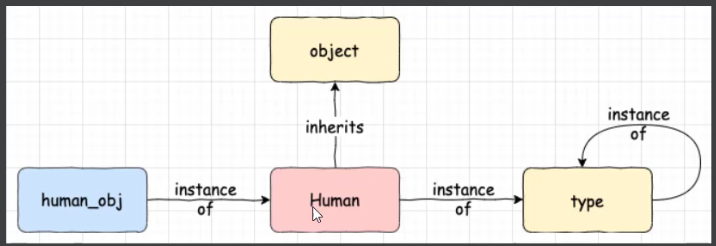

In [35]:
class Human:
    pass

human_obj = Human()

# ساخت آبجکت باعث میشه من یک نمونه از آن داشته باشم
# هیومن آبجکت یک نمونه از هیومن است
print(type(human_obj))
print(isinstance(human_obj, Human))
print("-" * 40)

# همه کلاس هایی که میسازیم از کلاس آبجکت ارثبری میکنند
print(Human.__base__)
print("-" * 40)

# همه کلاس ها یک نمونه از کلاس تایپ هستند
print(type(Human))
print(isinstance(Human, type))
print("-" * 40)

# خود تایپ یک نمونه از کلاس تایپ است
print(type(type))
print("-" * 40)

# همه انواع داده یک نمونه از متاکلاس تایپ هستند
n = 5
print(type(n))
print(isinstance(n, int))
print(type(int))
print(isinstance(int, type))
print("-" * 40)


<class '__main__.Human'>
True
----------------------------------------
<class 'object'>
----------------------------------------
<class 'type'>
True
----------------------------------------
<class 'type'>
----------------------------------------
<class 'int'>
True
<class 'type'>
True
----------------------------------------


In [37]:
# meta class
# به کلاس هایی گفته میشه که وقتی یک شی ایجاد میشه یک کلاس است
# example -> type
# از کلاس تایپ باید ارثبری بکند

class HumanMeta(type):
    pass

class Human(metaclass=HumanMeta):
    pass

h = Human()
print(type(h))
print(type(Human))
print(type(HumanMeta))


<class '__main__.Human'>
<class '__main__.HumanMeta'>
<class 'type'>


# abstract class

In [55]:
# ABC
# abstractmethod
# برای ساخت متد های انتزاعی 

from abc import ABC, abstractmethod

# Abstract Base Class
class Vehicle(ABC):
    
    @abstractmethod
    def move(self):
        """this method should be impolemented"""
        print("Default")
        
    @abstractmethod
    def repair(self):
        """this method should be impolemented"""
    
    # هم میشه نوع را تعیین کرد هم ابسترک متود بودنش را
    # @classmethod
    # @abstractmethod
    # def func(cls):
    #     """this method should be impolemented"""

    def class_name(self):
        print(self.__class__)

        
# concrete class        
class Car(Vehicle):        
    def move(self):
        # از دیفالت کلاس انتزاعی استفاده میکند
        super(Car, self).move()
            
    def repair(self):
        print("under repair")

class Airplane(Vehicle):
    def move(self):
        print("Flying...")
    
    def repair(self):
        print("under repair...")

car = Car()
car.class_name()
car.move()
car.repair()


print("-" * 30)
# برای فهمیدن متای ای بی سی
print(type(ABC))        
        

<class '__main__.Car'>
Default
under repair
------------------------------
<class 'abc.ABCMeta'>


In [56]:
# ABCMeta
# متل قبلی فقط بجای ارثبری از ای بی سی متاکلاس آنرا مشخص میکنیم

from abc import ABCMeta, abstractmethod

# Abstract Base Class
class Vehicle(metaclass=ABCMeta):
    
    @abstractmethod
    def move(self):
        """this method should be impolemented"""
        
    @abstractmethod
    def move(self):
        """this method should be impolemented"""

In [65]:

from abc import ABC, abstractmethod

# Abstract Base Class
class Vehicle(ABC):
    
    @abstractmethod
    def move(self):
        """this method should be impolemented"""
        print("Default")
        
    @abstractmethod
    def repair(self):
        """this method should be impolemented"""

    def class_name(self):
        print(self.__class__)

# Abstract Class
class LandVehicale(Vehicle):
    @abstractmethod
    def brake(self):
        """this method should be impolemented"""

# Abstract Class
class AirVehicle(Vehicle):
    @abstractmethod
    def eject(self):
        """this method should be impolemented"""      
        
# concrete class        
class Car(LandVehicale):        
    def move(self):
        print("Drive...")
            
    def repair(self):
        print("under repair...")
        
    def brake(self):
        print("braking...")

class Airplane(AirVehicle):
    def move(self):
        print("Flying...")
    
    def repair(self):
        print("under repair...")

    def eject(self):
        print("ejecting...")
        
        
a = Airplane()
a.class_name()
a.move()
a.repair()
a.eject()

# از کلاس ابسترکت نمیتونیم نمونه یا شی بسازیم
a = AirVehicle()

<class '__main__.Airplane'>
Flying...
under repair...
ejecting...


TypeError: Can't instantiate abstract class AirVehicle with abstract methods eject, move, repair

# operator overloading

In [69]:
# بطور مثال میتونیم تعریف کنیم عمگر جمع در اشیا حاصل از این کلاس چکاری انجام دهد

class Person:
    def __init__(self, name, age, national_code):
        self.name = name
        self.age = age
        self.national_code = national_code
        
    # خودش شی و آبجکت دوم را بعنوان ورودی میگرد
    def __add__(self, other):
        return self.age + other.age
     
    def __lt__(self, other):
        return self.age < other.age
    
    def __str__(self):
        return f"{self.name}"
    
p1 = Person("ali", 15, "12345")
p2 = Person("amir", 22, "22325")
print(p1 + p2)
print(p1 < p2)



37
True


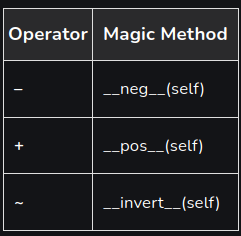

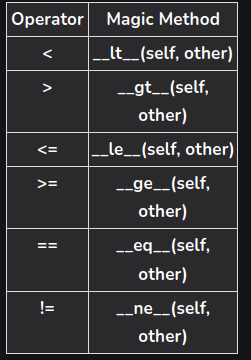

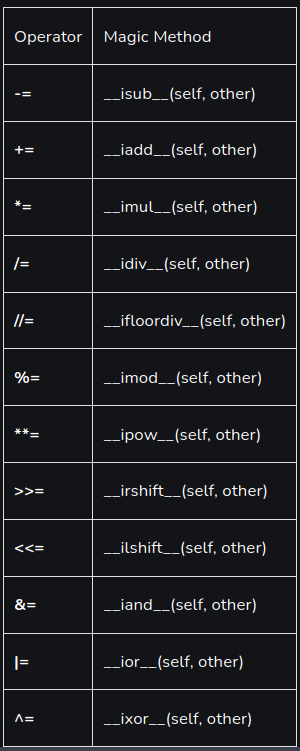

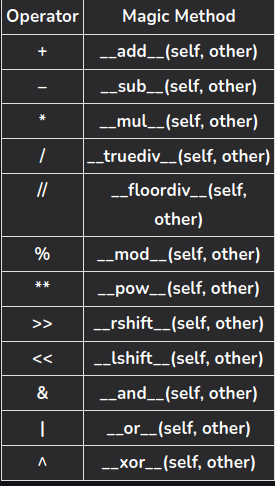

# slots

In [71]:
# با داندر دیکت میشه تمام اتریبیوت های یک شی را ببنیم
# بعد ساخت کلاس میشه اتریبیون اضافه کرد
# و میشه به این دیکشنری یک کلید مقدار جدید اضافه کرد


class MyClass:
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
obj = MyClass(1, 2)
print(obj.__dict__)
obj.c = 3
print(obj.__dict__)
obj.__dict__["c"] = 4
print(obj.__dict__)

# گاهی شاید بخاهیم این اجازه را ندهیم که اتریبیوتی به شی اضافه شود
# با استفاده از داندر اسلاتس این کار را میشه انجام داد

# __slots__
# باعث:
    # صرفه جویی در حافظه
    # دسترسی سریع به اتریبیوت

    
    

{'a': 1, 'b': 2}
{'a': 1, 'b': 2, 'c': 3}
{'a': 1, 'b': 2, 'c': 4}


In [75]:
class MyClass:
    __slots__ = ("a", "b")
    
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
obj = MyClass(1, 2)
print(obj.a)
print(obj.b)
obj.a = 3
obj.b = 3


1
2


In [73]:
# دیکشنری را غیرفعال میکند

class MyClass:
    __slots__ = ("a", "b")
    
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
obj = MyClass(1, 2)
print(obj.__dict__)

AttributeError: 'MyClass' object has no attribute '__dict__'

In [76]:
# کلید هایی که برای آن مشخص میکنیم اجازه میده فقط آنها قابل مقداردهی باشند
# اجازه ایجاد اتریبیوت دیگر را نمیدهد

class MyClass:
    __slots__ = ("a", "b")
    
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
obj = MyClass(1, 2)
obj.c = 6


AttributeError: 'MyClass' object has no attribute 'c'

In [77]:
# میشه بگیم چه اتریبیوت هایی بعدا میتونیم اضافه بکنیم
class MyClass:
    __slots__ = ("a", "b", "c")
    
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
obj = MyClass(1, 2)
obj.c = 6


In [81]:
# با داندر دیکت در فرزند یک دیکشنری خالی نمایش میدهد
# محدودیت ناشی از اسلاتس فقط برای والد ایجاد میشه و برای فرزند اعمال نمیشود

class ParentClass:
    __slots__ = ("a", "b")
    
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
class MyClass(ParentClass):
    def __init__(self, a, b):
        super().__init__(a, b)
        
        
obj = MyClass(1, 2)
print(obj.__dict__)
obj.c = 6
print(obj.__dict__)


{}
{'c': 6}


In [82]:
# میتونیم برای فرزند نیز اسلاتس ایجاد بکنیم

class ParentClass:
    __slots__ = ("a", "b")
    
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
class MyClass(ParentClass):
    __slots__ = ("c")
    
    def __init__(self, a, b):
        super().__init__(a, b)
        
        
obj = MyClass(1, 2)

obj.c = 6
print(obj.c)

6
